In [66]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.text_cell_render.rendered_html{font-size:18pt;}
div.text_cell_render ul li{font-size:22pt; line-height:30px;}
div.output {font-size:22pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:40px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:22pt;padding:5px;}
table.dataframe{font-size:22px;}
</style>
"""))

# 1. 데이터 생성
- 남, 여 키와 몸무게 데이터를 군집화 

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [13]:
random.randint(140, 195)

157

In [17]:
data = []
for i in range(50):
    # 여자 데이터 data추가
    data.append([random.randint(40, 70), random.randint(140, 170)])
    # 남자 데이터 data추가
    data.append([random.randint(60, 95), random.randint(160,195)])
#data

In [29]:
# 여자
# for female in data[::2]:
#     print(female, end=' ')

print('여자 : ', [ female for female in data[::2]])
print('남자 : ', [ male for male in data[1::2]])
print('===================================================')
print('여자 몸무게(x축) :', [female[0] for female in data[::2]])
print('여자 키(y축) :', [female[1] for female in data[::2]])

print('남자 몸무게(x축) :', [male[0] for male in data[1::2]])
print('남자 키(y축) :', [male[1] for male in data[1::2]])



여자 :  [[66, 150], [42, 165], [66, 170], [53, 167], [45, 158], [50, 160], [60, 157], [66, 161], [46, 168], [44, 168], [53, 150], [60, 150], [55, 166], [63, 153], [44, 151], [40, 148], [66, 142], [52, 152], [54, 149], [41, 146], [49, 163], [47, 159], [57, 158], [62, 170], [51, 155], [48, 164], [46, 152], [52, 149], [68, 143], [61, 141], [46, 146], [70, 148], [70, 144], [66, 148], [54, 161], [62, 143], [67, 148], [52, 158], [69, 166], [42, 144], [70, 161], [68, 167], [62, 167], [53, 160], [57, 166], [47, 141], [61, 146], [44, 159], [49, 155], [52, 166]]
남자 :  [[65, 172], [80, 172], [61, 171], [83, 161], [62, 193], [66, 168], [83, 189], [80, 164], [63, 182], [69, 195], [94, 176], [92, 190], [90, 165], [78, 170], [85, 187], [68, 163], [60, 185], [89, 190], [78, 169], [63, 166], [73, 180], [89, 172], [76, 174], [94, 182], [93, 167], [75, 167], [88, 166], [65, 176], [60, 172], [84, 177], [67, 160], [89, 166], [67, 186], [82, 195], [76, 191], [85, 192], [61, 163], [69, 162], [74, 181], [60, 16

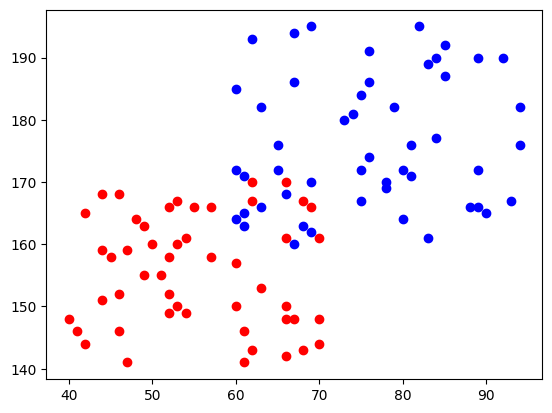

In [34]:
plt.plot([female[0] for female in data[::2]],
        [female[1] for female in data[::2]], 'o', color='r')
plt.plot([male[0] for male in data[1::2]],
        [male[1] for male in data[1::2]], 'o', color='b')
plt.show()

# 2. 군집화 로직

In [37]:
# 초기 랜덤 지점 2개
random_points = [
    [random.randint(40,95), random.randint(140,195)],
    [random.randint(40,95), random.randint(140,195)]
]
random_points

[[54, 175], [46, 152]]

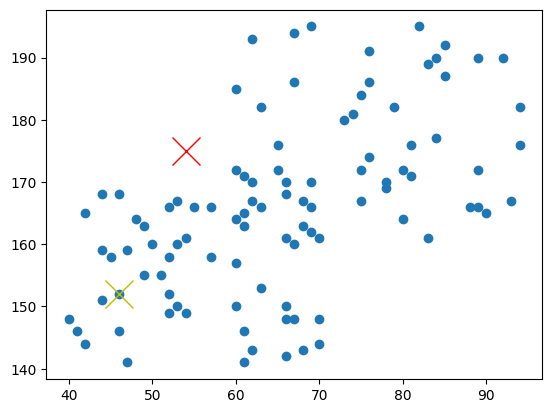

In [44]:
plt.plot([d[0] for d in data],
        [d[1] for d in data], 'o')
plt.plot(random_points[0][0],
       random_points[0][1], 'x', color = 'r', markersize=20) # 기준점(random_points[0])
plt.plot(random_points[1][0],
       random_points[1][1], 'x', color = 'y', markersize=20) # 기준점(random_points[1])

In [47]:
# 두 점 거리를 return a : [0,0]
def dist(a,b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)
print(dist([0,0], [3,4]))
print(dist(random_points[0], data[0]))
print(dist(random_points[1], data[0]))

27.730849247724095
20.09975124224178


In [49]:
# random_points[0]에 가까운 그룹과 random_points[1]에 가까운 그룹을 분류
group0 = []
group1 = []

for d in data:
    if dist(random_points[0], d) < dist(random_points[1], d):
        group0.append(d)
    else:
        group1.append(d)
len(group0), len(group1)        
    

(63, 37)

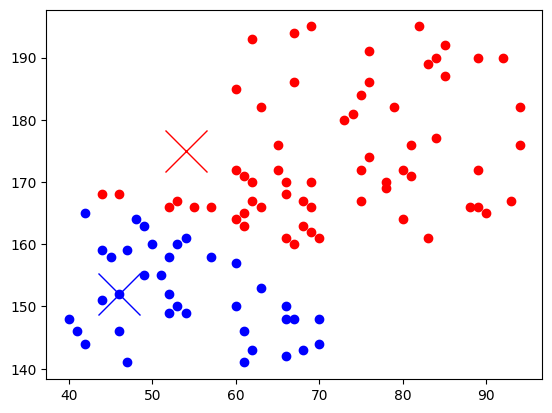

In [54]:
# group0과 group1, 기준점0, 기준점1
plt.plot([d[0] for d in group0],
        [d[1] for d in group0], 'o' , color='r')
plt.plot(random_points[0][0],
        random_points[0][1], 'x', color='r', markersize=30)

plt.plot([d[0] for d in group1],
        [d[1] for d in group1], 'o' , color='b')
plt.plot(random_points[1][0],
        random_points[1][1], 'x', color='b', markersize=30)

In [65]:
# 기준점 이동 : group0의 중심점(기준점0), group1의 중심점(기준점1)
group0_meanX = np.mean([d[0] for d in group0])
group0_meanY = np.mean([d[1] for d in group0])
random_points[0] = [group0_meanX, group0_meanY]

group1_meanX = np.mean([d[0] for d in group1])
group1_meanY = np.mean([d[1] for d in group1])
random_points[1] = [group1_meanX, group1_meanY]
random_points

[[72.28571428571429, 174.1904761904762], [54.0, 151.78378378378378]]

# 3. 군집화 전체 코드(for문 이용)
- 랜덤포인트 2개 지정
- 랜덤포인트 2개 시각화(x)
- forans
    * 랜덤포인트 2지점 기준으로 group0과 group1나눔
    * 랜덤포인트 출력과 시각화
    * group0의 중간점과 group1의 중간점을 랜덤포인트로 업데이트


초기 기준점 : [[50, 180], [69, 154]]
1 번째 points : [[64.11428571428571, 177.4857142857143], [66.27692307692308, 159.66153846153847]]
2 번째 points : [[73.86486486486487, 180.56756756756758], [60.61904761904762, 157.28571428571428]]
3 번째 points : [[78.39024390243902, 178.70731707317074], [56.57627118644068, 157.0]]
4 번째 points : [[78.39024390243902, 178.70731707317074], [56.57627118644068, 157.0]]
5 번째 points : [[78.39024390243902, 178.70731707317074], [56.57627118644068, 157.0]]
6 번째 points : [[78.39024390243902, 178.70731707317074], [56.57627118644068, 157.0]]
7 번째 points : [[78.39024390243902, 178.70731707317074], [56.57627118644068, 157.0]]
8 번째 points : [[78.39024390243902, 178.70731707317074], [56.57627118644068, 157.0]]
9 번째 points : [[78.39024390243902, 178.70731707317074], [56.57627118644068, 157.0]]


(140.0, 195.0)

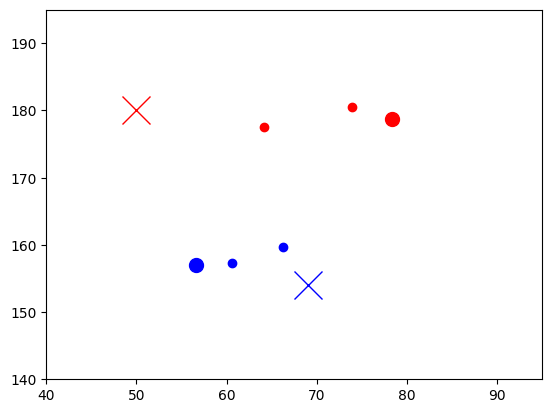

In [90]:
points = [
    [random.randint(40, 95), random.randint(140,195)],
    [random.randint(40, 95), random.randint(140,195)],
]
print('초기 기준점 :', points)
plt.plot(points[0][0], points[0][1], 'x', color='r', markersize=20)
plt.plot(points[1][0], points[1][1], 'x', color='b', markersize=20)
for i in range(1, 10):
    # 포인트 2지점 기준으로 group0과 group1나눔
    group0 = []
    group1 = []
    for d in data:
        if dist(d, points[0]) < dist(d, points[1]):
            group0.append(d)
        else:
            group1.append(d)
        
    # group0의 중간점, group1의 중간점으로 points 업데이트
    group0_mean_X = np.mean([d[0] for d in group0])
    group0_mean_Y = np.mean([d[1] for d in group0])
    points[0] = [group0_mean_X, group0_mean_Y]
    group1_mean_X = np.mean([d[0] for d in group1])
    group1_mean_Y = np.mean([d[1] for d in group1])
    points[1] = [group1_mean_X, group1_mean_Y]
    
    # 포인트 출력
    print(i, '번째 points :', points)
    plt.plot(points[0][0], points[0][1], 'o', color='r')
    plt.plot(points[1][0], points[1][1], 'o', color='b')
    
    
plt.plot(points[0][0], points[0][1], 'o', color='r', markersize=10)
plt.plot(points[1][0], points[1][1], 'o', color='b', markersize=10)
plt.xlim([40,95])
plt.ylim([140,195])

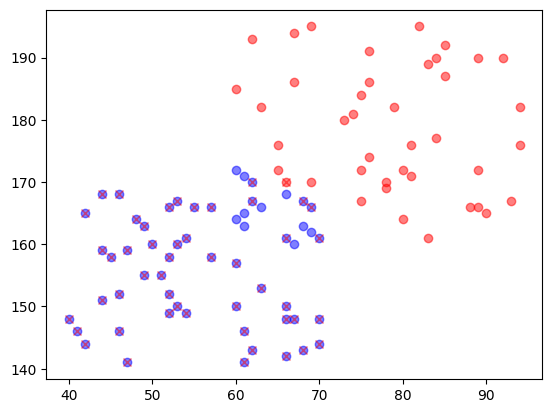

In [98]:
plt.plot([d[0] for d in group0],
        [d[1] for d in group0], 'o', color='r', alpha=0.5)
plt.plot([d[0] for d in group1],
        [d[1] for d in group1], 'o', color='b', alpha=0.5)
plt.plot([d[0] for d in data[::2]],
        [d[1] for d in data[::2]], 'x', color='r',alpha = 0.5)

# 4. api(sklearn)를 이용한 군집화
- sklearn : 머신러닝 패키지
    * 예측모델 : 분류, 회귀, 군집분석 -fit(학습), predicet(예측)
    * 변환모델 : 전처리시 사용 ex. 스케일조정 - fit(학습), transform(변환함수)

In [100]:
# 군집분석 라이브러리가 경고 메세지(joblib 충돌) 출력할 경우
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [106]:
from sklearn.cluster import KMeans
data = np.array(data)
model = KMeans(n_clusters=2, # 2개 그룹으로 군집
              init='random', # 초기 기준점을 random하게
              n_init=10,     # 10번 실행
              random_state=7) # random 결과를 일관적으로 맞추기 위한 seed
model.fit(data)


KMeans(init='random', n_clusters=2, n_init=10, random_state=7)

In [102]:
# 기준점(중심점)
model.cluster_centers_

array([[ 77.93023256, 178.13953488],
       [ 56.15789474, 156.66666667]])

In [103]:
# 나눠진 그룹들의 인덱스
model.labels_

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [108]:
group0 = data[model.labels_==0]
group1 = data[model.labels_==1]